<a href="https://colab.research.google.com/github/vivianusdjpy/Supervised-Learning-with-Various-Regression-Techniques/blob/master/Supervised_Learning_using_various_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis:
# Predicting the Price of a House.

## 1. Defining the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### a) Specifying the Question


Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.



### b) Defining the Metric for Success
This project will be successful when:
1)We accurately predict the winning team based on the two factors:

       a)Home team or away team

       b)The type of tournament 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context 
The Coca-Cola ranking system was designed by FIFA and named 'SUM'.
This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score.
The lowest score which may be negative indicates the worst team while the highest score indicated the best team.

### d)Experimental Design
The project was undertaken using the following design
Datasets(Independent Project Week 7 - house_data.csv)

Performing EDA

Feature Engineering

Multiple Linear Regression

Quantile regression

Ridge Regression

Lasso Regression

Elastic-Net Regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Reading the Data

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
#loading the dataset
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#obtaining information about the dataset
data.info()
#the data has 20 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [0]:
#describing the data using measures of central tendency(mean,mode and median) and measures
#of dispersion(standard deviation, variance)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Univariate Analysis

#Price column
This is the dependent variable which we are trying to predict.

In [0]:
#describing the price column in the dataset using measures of central tendency and measures of dispersion
data['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#Bedrooms
This column indicates the number of bedrooms in the house

In [0]:
data.bedrooms.nunique()
#There are 13 unique vales for the number of bedrooms in the house
data.bedrooms.unique()
#The unique values are
[ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33]
#data.bedrooms.value_counts()

[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]

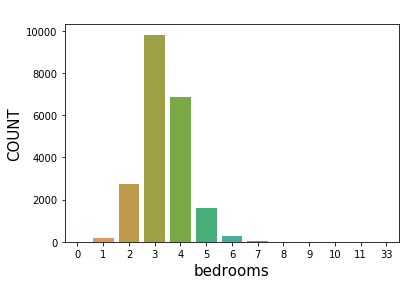

In [0]:
#visualizing the distribution of bedrooms in the dataset
sb.countplot('bedrooms',data = data)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bedrooms",fontsize=16,color="white")
plt.show()
#The distribution is normal

Text(0.5, 1.0, 'Boxplot of Bedrooms')

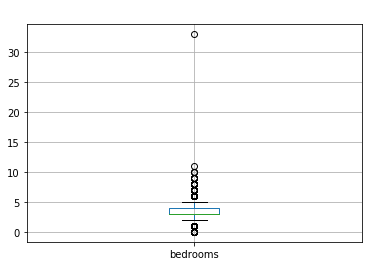

In [0]:
#checking for outliers
data.boxplot(column=['bedrooms'])
plt.title("Boxplot of Bedrooms",fontsize=16,color="white")
#there are a few outliers

In [0]:
#dropping the outlier
#creating a copy
data1 = data
data1.drop(data1.index[data1['bedrooms'] == 33], inplace = True)

In [0]:
#one values has been dropped
data1.shape

(21612, 20)

#Bathrooms Column
This column gives the number of bathrooms in the house

In [0]:
data1.bathrooms.nunique()
#there are 30 unique values
data1.bathrooms.describe()

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

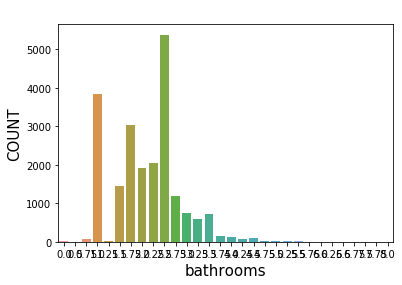

In [0]:
#visualizing the distribution of bathrooms in the dataset
sb.countplot('bathrooms',data = data1)
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bathrooms",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

Text(0.5, 1.0, 'Boxplot of Bathrooms')

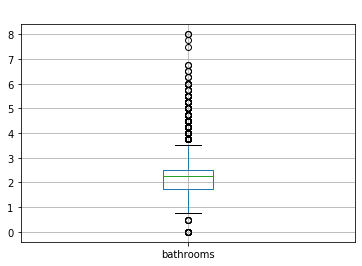

In [0]:
#checking the bathrooms column distribution using a boxplot
data1.boxplot(column=['bathrooms'])
plt.title("Boxplot of Bathrooms",fontsize=16,color="white")

#View Column
The view column shows the number of views that the house has and the value ranges from 0 to 4

In [0]:
#There are 5 unique values for the view column
data1.view.unique()

array([0, 3, 4, 2, 1])

In [0]:
#counting the number of values in the view column.
data1['view'].value_counts()

0    19488
2      963
3      510
1      332
4      319
Name: view, dtype: int64

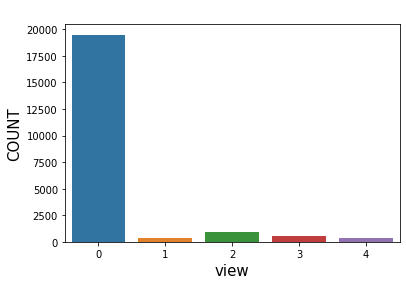

In [0]:
sb.countplot('view',data = data1)
plt.xlabel("view",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of VIEW",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

#### 90.2 percent of the data in the view column consists of zeros. This column  does not provide alot of information thus we drop it.

In [0]:
#creating a copy
data2 = data1

In [0]:
#Dropping the view column
data2.drop('view', axis=1, inplace=True)
data2.shape


(21612, 19)

###View column dropped!

# Waterfront column
Boolean

In [0]:
#The waterfront column is boolean.
# 0 indicates no waterfront while 1 indicates presence of a waterfront
#
data2.waterfront.unique()

array([0, 1])

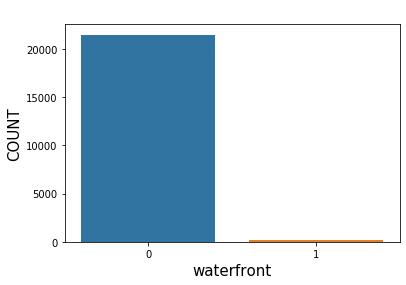

In [0]:
sb.countplot('waterfront',data = data2)
plt.xlabel("waterfront",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of WaterFront",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

### Most of the houses do not have a Waterfront.

#Condition
Ordinal column that ranks the condition of a house from 1 to 5. 1 is a low ranking while 5 is the highest ranking.

In [0]:
data2.condition.unique()
#The condition values from 1 to 5

array([3, 5, 4, 1, 2])

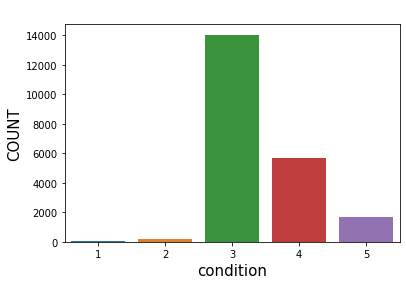

In [0]:
#visualizing the distribution of the condition of houses
sb.countplot('condition',data = data1)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Condition",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

####Most of the houses have an above average condition.

#Grade

In [0]:
data2.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

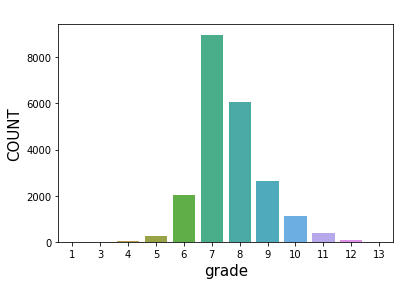

In [0]:
#visualizing the distribution of the condition of houses
sb.countplot('grade',data = data2)
plt.xlabel("grade",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Grade",fontsize=16,color="white")
plt.show()
#The Grade with the highest count is 7 followed by 8.

#Yr_built

In [0]:
data2.yr_built.unique()
#the data is for houses built between 1935 and 1955

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

#Yr_renovated

In [0]:
data2.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

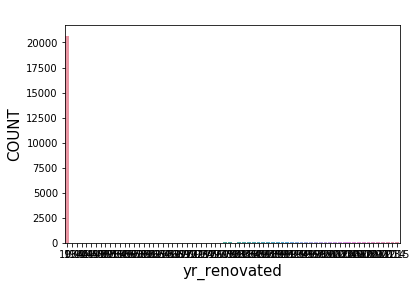

In [0]:
#visualizing the distribution of the condition of houses
sb.countplot('yr_renovated',data = data2)
plt.xlabel("yr_renovated",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of yr_renovated",fontsize=16,color="white")
plt.show()


In [0]:
#creating a copy
data3 = data2

In [0]:
#Dropping the yr_renovated column
data3.drop('yr_renovated', axis=1, inplace=True)
data3.shape

(21612, 18)

95% Percent of the column has zeros. The column does not provide alot of information thus we drop it.

##zipcode

##Lat ,	long

In [0]:
#Dropping the sqft_living15	and sqft_lot15 column
#creating a copy
data4 = data3
data4.drop(columns=['sqft_living15','sqft_lot15'], axis=1, inplace=True)
data4.shape


(21612, 16)

# Feature Engineering

# 7.Bivariate Analysis

In [0]:
data4

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,98103,47.6993,-122.346
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,98146,47.5107,-122.362
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,98144,47.5944,-122.299
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,98027,47.5345,-122.069


## Checking for Multi-collinearity

In [0]:
# Let's display the correlations between the variables
corr = data4[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',	'waterfront',	'condition','grade','sqft_above','sqft_basement','yr_built',]].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built
price,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.036366,0.667476,0.605589,0.323833,0.053993
bedrooms,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.309490,0.159167
bathrooms,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.283789,0.506012
sqft_living,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.435065,0.318037
sqft_lot,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.015293,0.053073
floors,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,-0.245684,0.489302
waterfront,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,0.080591,-0.026165
condition,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,0.174057,-0.361380
grade,0.667476,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.168412,0.446952
sqft_above,0.605589,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,-0.051918,0.423879


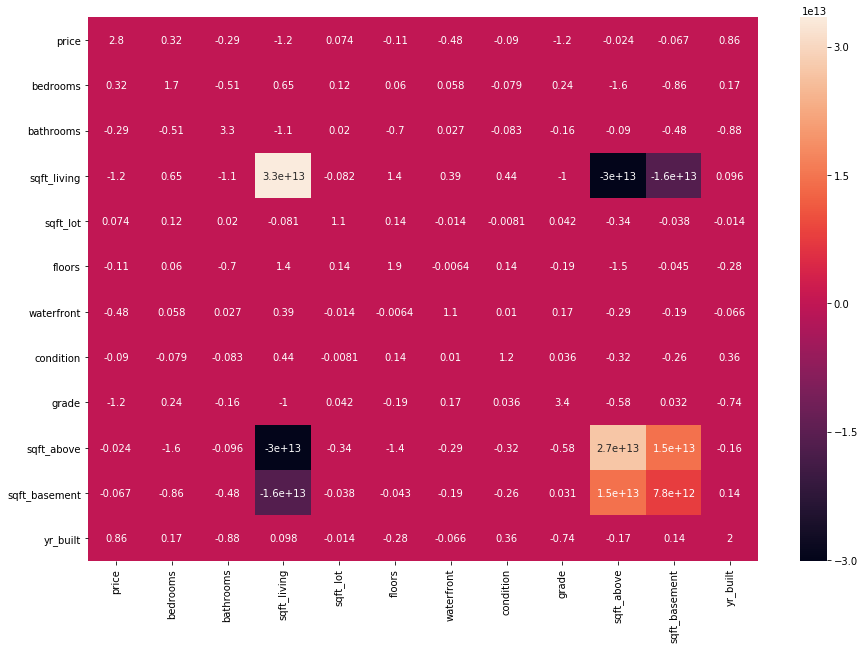

In [0]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
plt.figure(figsize=(15,10))
sb.heatmap(VIF_df, annot = True)
plt.show()

##### The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

# Regression


#1st Approach: Multiple Linear Regression

In [147]:
X = data4.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
y = data4.iloc[:, 1].values
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  ...  sqft_basement  yr_built  zipcode
0             3       1.00         1180  ...              0      1955    98178
1             3       2.25         2570  ...            400      1951    98125
2             2       1.00          770  ...              0      1933    98028
3             4       3.00         1960  ...            910      1965    98136
4             3       2.00         1680  ...              0      1987    98074
...         ...        ...          ...  ...            ...       ...      ...
21608         3       2.50         1530  ...              0      2009    98103
21609         4       2.50         2310  ...              0      2014    98146
21610         2       0.75         1020  ...              0      2009    98144
21611         3       2.50         1600  ...              0      2004    98027
21612         2       0.75         1020  ...              0      2008    98144

[21612 rows x 12 columns]
[221900. 538000. 180000. 

In [153]:
#Splitting the data into train and test
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the
#sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X_train,y_train)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)



ValueError: ignored

In [149]:
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

NameError: ignored

The RMSE score for the model is quite high hence low predictive capability

## Checking for Heteroskedasticity using Barlette's Test

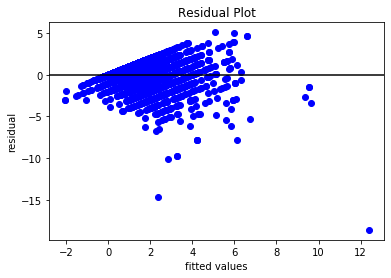

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

## Model 2: Predicting the Away_Score

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_df7.iloc[:, [0,1,2,8,9,10,11,12]]
y = final_df7['AWAY_SCORE'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())


The RMSE score for the model :  1.1130505457819098
The residual mean score for the model :  -0.022723320765105755


The RMSE score for the model is quite high hence low predictive capability

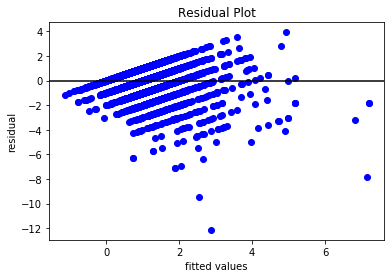

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

# 2nd Approach: Quantile Regression

In [0]:
# Testing my model with several classiffiers to see the better classifier
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
#classifier.append(('SVM ', SVC(gamma='auto')))

res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
## We can see that logistic reggresion has the highest accuracy.
## thus we use it for classification modelling

Logistic Regression : 0.428465 (0.006814)
Random Forest : 0.711661 (0.006001)
GussianNB : 0.119643 (0.005638)


In [0]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


# 3rd Approach: Ridge Regression

# 4th Approach: Lasso Regression

# 5th Approach: Elastic-Net Regression

There are no patterns to explain the variances in the data.
The features are independent.

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

### c). Did we have the right question?

YES!
Football is  greatly loved sport and predicting the outcome of a match based on previous outcomes is an interesting challenge.

#Conclusion

Polynomial Regression and Logistic Regression do not yield an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered